<h1 style="text-align: center;">WSI - przeszukiwanie </h1>

### 1. Rysowanie wykresów funkcji f i g:

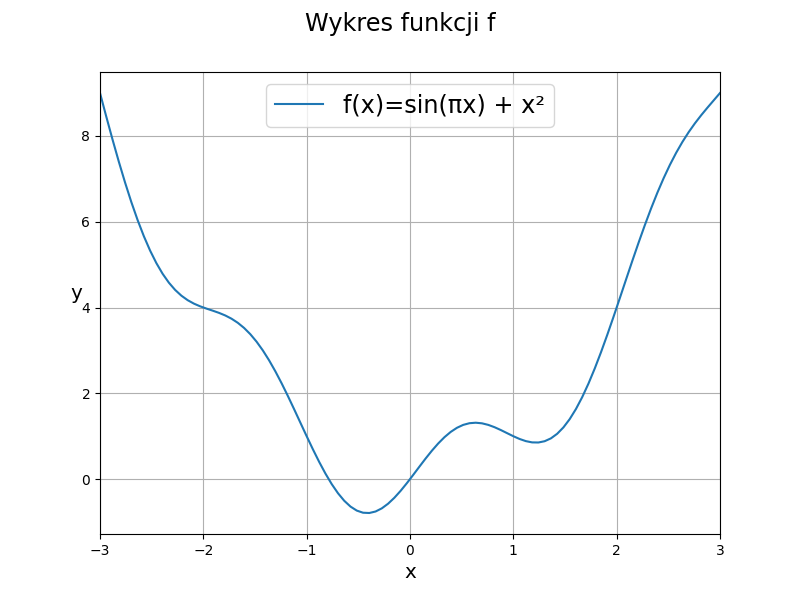

In [1]:
%matplotlib ipympl

from matplotlib import pyplot as plt
from plotting import plot_2d
import numpy as np
from solver import Function, Experiment

F_LINSPACE = np.linspace(-3, 3, 100)

f = Function(
    lambda x: np.sin(np.pi * x) + x**2, 
    lambda x: np.pi * np.cos(np.pi * x) + 2 * x,
    2, (-10, 10)
    )  

plot_2d(F_LINSPACE, f.f, "f(x)=sin(πx) + x²", "Wykres funkcji f")

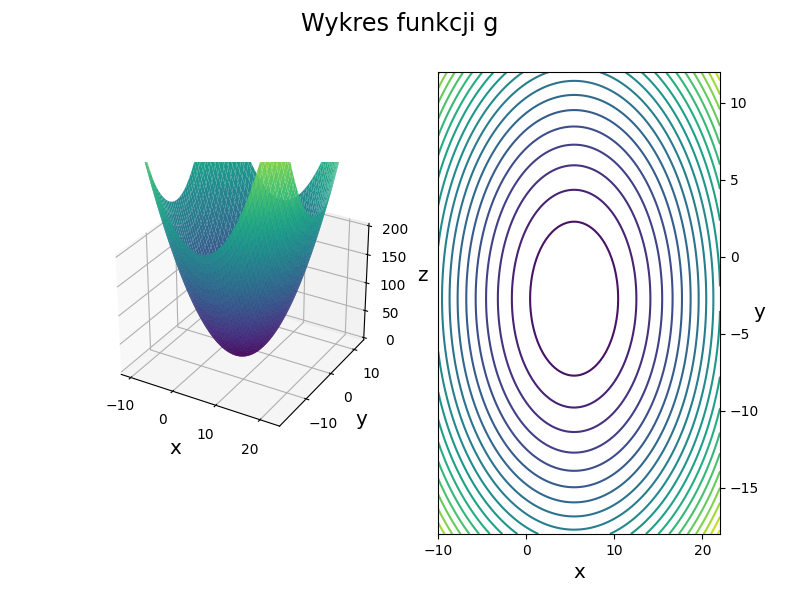

In [2]:
from plotting import plot_3d

G_LINSPACEX = np.linspace(-10, 22, 100)
G_LINSPACEY = np.linspace(-18, 12, 100)

g = Function(
    lambda x1, x2: 5*np.exp(2) - 4*np.exp(1)*x1 + x1**2 + 2*np.exp(1)*x2 + x2**2,
    lambda x1, x2: np.array([-4*np.exp(1) + 2*x1, 2*np.exp(1) + 2*x2]),
    3, ((0, 12), (-8, 2))
)

plot_3d(G_LINSPACEX, G_LINSPACEY, g.f, "Wykres funkcji g")

Łatwiejsza do optymalizacji będzie funkcja g, ponieważ posiada ona tylko jedno minimum lokalne będące równocześnie jej minimum globalnym. Funkcja f posiada dwa minima lokalne zatem znalezienie minimum globalnego będzie w dużej mierze zależało od wyboru punktu startowego. Optymalizując funkcję g, zakładając dobry wybór parametru kroku, zawsze znajdziemy jej minimum globalne.

### 2. Optymalizacja funkcji przy użyciu algorytmu najszybszego spadku:

Algorytm został zaimplementowany w pliku *gradien_descent.py*.


#### - Optymalizacja funcji f

In [3]:
STARTING_POINT1 = np.array([-2.5])
STARTING_POINT2 = np.array([2.5])
LEARNING_RATE = 0.1
PRECISION = 1e-6
MAX_ITERATIONS = 1000

exp1 = Experiment(f, STARTING_POINT1, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result1 = exp1.conduct()

exp2 = Experiment(f, STARTING_POINT2, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result2 = exp2.conduct()

plot_2d(F_LINSPACE, f.f, (-3, 3), "f(x)=sin(πx) + x²", "Wynik działania algorytmu najszybszego spadku", result1.path_to_min)
print(f"Minimum funkcji f: {f.f(*result1.minimum)}, w punkcie x = {result1.minimum[0]}")

plot_2d(F_LINSPACE, f.f, (-3, 3), "f(x)=sin(πx) + x²", "Wynik działania algorytmu najszybszego spadku", result2.path_to_min)
print(f"Minimum funkcji f: {f.f(*result2.minimum)}, w punkcie x = {result2.minimum[0]}")


TypeError: plot_2d() takes from 2 to 5 positional arguments but 6 were given

#### - Optymalizacja funkcji g

In [ ]:
STARTING_POINT = np.array([20, 10])
LEARNING_RATE = 0.1
PRECISION = 1e-6
MAX_ITERATIONS = 1000

exp3 = Experiment(g, STARTING_POINT, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result = exp3.conduct()

plot_3d(G_LINSPACEX, G_LINSPACEY, g.f, "Wynik działania algorytmu najszybszego spadku", result.path_to_min)
print(f"Minimum funkcji g: {g.f(*result.minimum)}, w punkcie x = ({result.minimum[0]}, {result.minimum[1]})")

### 3. Badanie wpływu rozmiaru kroku dla różnych punktów początkowych:

In [6]:
from solver import Solver
import pandas as pd

ITERATION_NUMBER = 1000
EXPERIMENTS_NUMBER = 1000
LEARNING_RATES = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]

s1 = Solver(ITERATION_NUMBER, f, LEARNING_RATES)
s1.generate_experiments(30)
s1.solve()
results = s1.get_results_data()

Wyniki przeprowadzonych eksperymentów dla funkcj f:

In [7]:
df = pd.DataFrame(results, columns=["parametr kroku", "punkt początkowy", "wynik działania algorytmu", "czas trwania", "liczba iteracji"]) 
df_sorted = df.sort_values(by="parametr kroku")
df_sorted.reset_index(drop=True)

,parametr kroku,punkt początkowy,wynik działania algorytmu,czas trwania,liczba iteracji
0,0.001,[-1.556513137180488],[-0.4149385590086626],0.021239,1000
1,0.001,[2.5608621099136215],[1.217906410306523],0.030764,1000
2,0.001,[1.4940673230237795],[1.2177091149782862],0.019588,1000
3,0.001,[-2.642153779201099],[-0.482347079040908],0.028811,1000
4,0.010,[-0.18483569601217198],[-0.4149115189071413],0.004256,123
5,0.010,[2.273623419183833],[1.217657015010028],0.007171,180
6,0.010,[-1.5819176446424141],[-0.4149116808850944],0.002843,144
7,0.100,[-0.10249636647683591],[-0.4149116548089843],0.000261,8
8,0.100,[2.3687659767708986],[1.2176568472210387],0.000309,10
9,0.100,[0.05837543379978749],[-0.4149115801596942],0.000210,9
